In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, AveragePooling2D, Input
from tensorflow.keras.models import Model, Sequential, save_model, load_model
from sklearn.metrics import roc_curve, roc_auc_score

from keras.utils.np_utils import to_categorical

import librosa
import librosa.display

import numpy as np
import pandas as pd
import random
import os

import matplotlib.pyplot as plt

import pickle

import warnings 
warnings.filterwarnings('ignore')

In [2]:
def plot_history(history, yrange):
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    plt.legend(['train', 'test'], loc='upper left')
    
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [3]:
fh = open("/Users/home/Documents/Respiratory Illness AI/datasets/copd_asthma_dataset_128", 'rb')
dataset = pickle.load(fh)

In [4]:
input_shape1 = (128, 31, 1)
input_shape2 = (224, 224, 1)

In [5]:
random.shuffle(dataset)
train = dataset[:130]
val = dataset[130:170]
# test = dataset[170:]

X_train, y_train = zip(*train)
X_val, y_val = zip(*val)
# X_test, y_test = zip(*test)

X_train = np.array([x.reshape(input_shape1) for x in X_train])
X_val = np.array([x.reshape(input_shape1) for x in X_val])
# X_test = np.array([x.reshape(input_shape1) for x in X_test])

y_train = np.array(to_categorical(y_train, 2))
y_val = np.array(to_categorical(y_val, 2))
# y_test = np.array(to_categorical(y_test, 2))

In [6]:
# feature map 
fms = [24, 48, 16]
matrix_sizes = [(3, 3), (5, 5), (2, 2)]
strides = [(3, 3), (1, 1), (2, 2)]
activations = ['relu', 'sigmoid']
dropout_rates = [0.5, 0.6, 0.7, 0.8]
dense_values = [128, 256]

In [7]:
model = Sequential()

model.add(Conv2D(24, (3, 3), strides=(1, 1), input_shape=input_shape1))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(24, (3, 3), padding="valid"))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(24, (3, 3), padding="valid"))
model.add(Activation('relu'))

model.add(Conv2D(48, (3, 3), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.6))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(rate=0.6))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(rate=0.6))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(rate=0.6))

model.add(Dense(2))
model.add(Activation('sigmoid'))

2022-02-09 18:32:34.449267: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(
    optimizer="SGD", 
    loss="categorical_crossentropy", 
    metrics=['accuracy'])

history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=25, 
    batch_size=15, 
    validation_data=(X_val, y_val))

2022-02-09 18:32:34.957486: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
9/9 [==============================] - 1s 71ms/step - loss: 1.0774 - accuracy: 0.4154 - val_loss: 0.6841 - val_accuracy: 0.5500
Epoch 2/25
9/9 [==============================] - 0s 40ms/step - loss: 0.7571 - accuracy: 0.5538 - val_loss: 0.6824 - val_accuracy: 0.5750
Epoch 3/25
9/9 [==============================] - 0s 43ms/step - loss: 0.7894 - accuracy: 0.5154 - val_loss: 0.6823 - val_accuracy: 0.5000
Epoch 4/25
9/9 [==============================] - 0s 41ms/step - loss: 0.6624 - accuracy: 0.6000 - val_loss: 0.6784 - val_accuracy: 0.6000
Epoch 5/25
9/9 [==============================] - 0s 42ms/step - loss: 0.7250 - accuracy: 0.5154 - val_loss: 0.6782 - val_accuracy: 0.7000
Epoch 6/25
9/9 [==============================] - 0s 40ms/step - loss: 0.6802 - accuracy: 0.5846 - val_loss: 0.6761 - val_accuracy: 0.7000
Epoch 7/25
9/9 [==============================] - 0s 44ms/step - loss: 0.6757 - accuracy: 0.6077 - val_loss: 0.6801 - val_accuracy: 0.6500
Epoch 8/25
9/9 [===========

In [9]:
score = model.evaluate(x=X_val, y=y_val)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

2/2 [==============================] - 0s 9ms/step - loss: 0.6434 - accuracy: 0.7000
Test loss:  0.6434097290039062
Test accuracy:  0.699999988079071


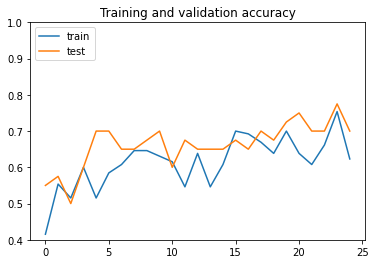

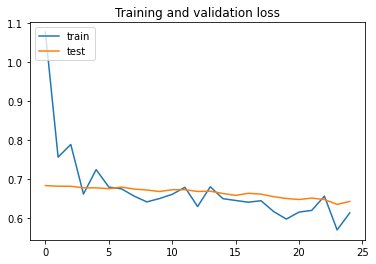

In [10]:
plot_history(history, (0.4, 1))

In [11]:
y_score = model.predict(X_val)
# false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, y_score)
print('roc_auc_score: ', roc_auc_score(y_val, y_score))

roc_auc_score:  0.7656641604010026


In [12]:
save_model(
    model, 'normal_CNN69', overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None, save_traces=True
)

2022-02-09 18:34:02.280857: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: normal_CNN69/assets


In [ ]:
#questions: sometimes the validation loss increases a lot towards the end and validation accuracy decreases a lot towards the end